In [81]:
!pip install wordcloud

In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from wordcloud import WordCloud
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/togneva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import and Cleanup Data

In [3]:
news_df = pd.read_csv('Resources/nlp_sample.csv')

In [4]:
news_df.head(5)

,Unnamed: 0,category,headline,authors,link,short_description,date,new_category,article,article_length
0,0,HOME & LIVING,Master Spring Cleaning With These Surprising Tips,"Laura McHolm, Contributor\nNorthStar Moving Co...",https://www.huffingtonpost.com/entry/spring-cl...,Do you have a home story idea or tip? Email us...,2013-04-03,ARTS & CULTURE,"So, it's that time of year again when we get d...",5234.0
1,1,FOOD & DRINK,Labor Day Grilling: Szechuan Pork Chops,"Anne Maxfield, Contributor\nFounder",https://www.huffingtonpost.com/entry/labor-day...,Because it's probably unconstitutional not to ...,2013-09-09,ARTS & CULTURE,Because it's probably unconstitutional not to ...,1872.0
2,2,ARTS,Return of the Artisan?,"Phil Simon, ContributorSpeaker, author, professor",https://www.huffingtonpost.com/entry/return-of...,The digital revolution in music has always fac...,2014-10-26,ARTS & CULTURE,The digital revolution in music has always fac...,7045.0
3,3,HOME & LIVING,Honey Boo Boo's Mother June Shannon Gives A To...,Amy Marturana,https://www.huffingtonpost.com/entry/honey-boo...,"Her ""stockpile"" room is quite, um, impressive.",2012-12-28,ARTS & CULTURE,It's safe to say that one of the biggest pop c...,2039.0
4,4,ARTS,How One Woman Is Turning Her Online Harassment...,Priscilla Frank,https://www.huffingtonpost.com/entry/amy-davis...,NaN,2014-09-13,ARTS & CULTURE,This post originally appeared on Slate. \nBy P...,3212.0


### Preprocess Data

In [5]:
# Remove stopwords
stop_words = stopwords.words('english')

#Remove numbers and special characters
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', str(text))
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # remove stop words
    clean_list = " ".join([word for word in text_nopunct.split() if word not in stop_words])
#     clean_text = ' '.join(clean_list)
    
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    clean_text = re.sub('\s+', ' ', clean_list).strip()
    
    return clean_text

news_df['article'] = news_df['article'].apply(clean_text)
news_df.head(5)  

,Unnamed: 0,category,headline,authors,link,short_description,date,new_category,article,article_length
0,0,HOME & LIVING,Master Spring Cleaning With These Surprising Tips,"Laura McHolm, Contributor\nNorthStar Moving Co...",https://www.huffingtonpost.com/entry/spring-cl...,Do you have a home story idea or tip? Email us...,2013-04-03,ARTS & CULTURE,time year get hands knees scrub home top botto...,5234.0
1,1,FOOD & DRINK,Labor Day Grilling: Szechuan Pork Chops,"Anne Maxfield, Contributor\nFounder",https://www.huffingtonpost.com/entry/labor-day...,Because it's probably unconstitutional not to ...,2013-09-09,ARTS & CULTURE,probably unconstitutional grill labor day acci...,1872.0
2,2,ARTS,Return of the Artisan?,"Phil Simon, ContributorSpeaker, author, professor",https://www.huffingtonpost.com/entry/return-of...,The digital revolution in music has always fac...,2014-10-26,ARTS & CULTURE,digital revolution music always faced outspoke...,7045.0
3,3,HOME & LIVING,Honey Boo Boo's Mother June Shannon Gives A To...,Amy Marturana,https://www.huffingtonpost.com/entry/honey-boo...,"Her ""stockpile"" room is quite, um, impressive.",2012-12-28,ARTS & CULTURE,safe say one biggest pop culture phenomenons c...,2039.0
4,4,ARTS,How One Woman Is Turning Her Online Harassment...,Priscilla Frank,https://www.huffingtonpost.com/entry/amy-davis...,NaN,2014-09-13,ARTS & CULTURE,post originally appeared slate phil plait good...,3212.0


### Create Word Clouds

In [6]:
categories = list(set(news_df['new_category'].values))

In [8]:
# Create a function to create wordcloud image and save it to the Resources folder
def create_wordcloud(df, category_column, category, text_column):
    # create dataframe for selected category
    cat_df = df.loc[df[category_column] == category]
    # create an array of all articles
    text = cat_df[text_column].values
    
    # plot the wordcloud
    wordcloud = WordCloud(width= 950, height= 650,
                          max_font_size = 110,
                          collocations = False).generate(str(text))    
    wordcloud_png = plt.imshow(wordcloud, interpolation=None)
    plt.axis("off")
    plt.savefig(f'Resources/{category}_wordcloud.png', bbox_inches='tight')
    plt.show()    

    return wordcloud_png

This is wordcloud for category: POLITICS


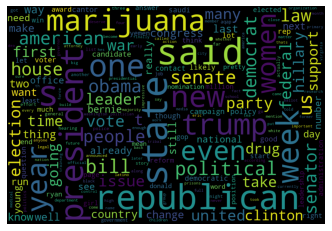

This is wordcloud for category: EDUCATION


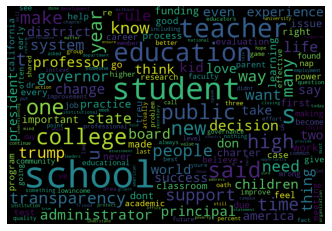

This is wordcloud for category: ARTS & CULTURE


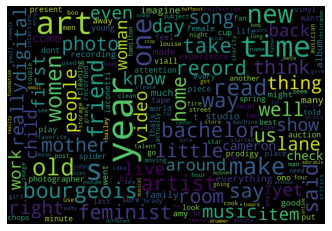

This is wordcloud for category: BUSINESS


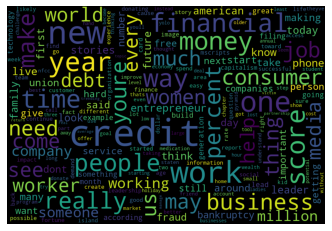

This is wordcloud for category: HEALTH & WELLNESS


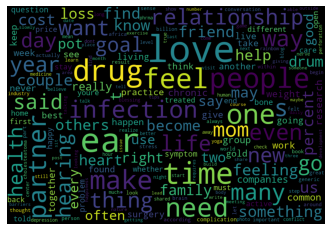

This is wordcloud for category: VOICES


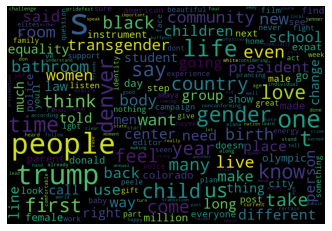

This is wordcloud for category: ENTERTAINMENT


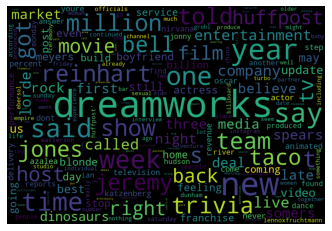

This is wordcloud for category: TECH & SCIENCE


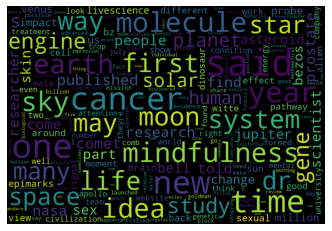

This is wordcloud for category: RELIGION


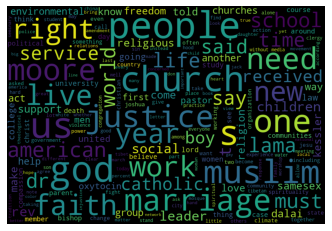

This is wordcloud for category: CRIME


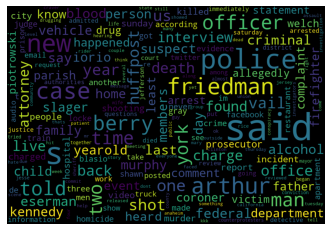

This is wordcloud for category: ENVIRONMENT


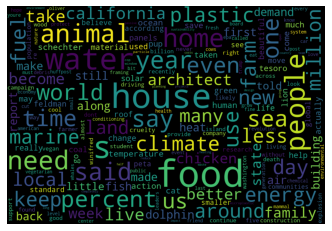

This is wordcloud for category: SPORTS


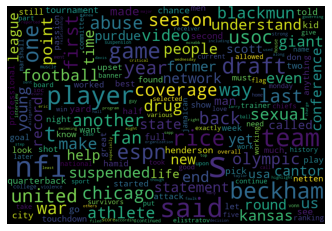

This is wordcloud for category: FAMILY


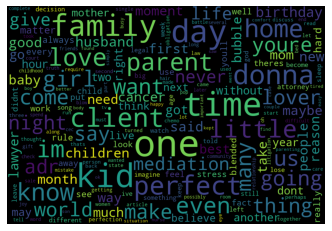

In [9]:
for category in categories:
    print (f'This is wordcloud for category: {category}')
    create_wordcloud(news_df, 'new_category', category, 'article')
    